# Importing Libraries

In [1]:
from rdkit import RDLogger
from IPython.display import HTML
from molgx import *
import kagglehub

## Setup Logging

In [2]:
logging.basicConfig()
# Supress RDKit logger message
RDLogger.DisableLog('rdApp.*')
# Suppress warnings of Python library
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/OpenDrugAI/AttentiveFP/refs/heads/master/data/qm9.csv')

In [4]:
raw_df.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028


In [5]:
raw_df["SMILES"] = raw_df["smiles"]
raw_df = raw_df.drop("smiles", axis=1)
raw_df.head()

,mol_id,A,B,C,mu,alpha,homo,lumo,gap,r2,...,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,SMILES
0,gdb_1,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,...,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,C
1,gdb_2,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,...,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,N
2,gdb_3,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,...,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,O
3,gdb_4,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,...,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,C#C
4,gdb_5,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,...,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,C#N


In [6]:
raw_df.to_csv("qm9.csv")

In [7]:
# moldata = MolData.read_csv(path)
# moldata = MolData.read_csv('../sample_data/QM9_partial_500.csv')
# moldata = MolData.read_csv('https://raw.githubusercontent.com/OpenDrugAI/AttentiveFP/refs/heads/master/data/qm9.csv')
moldata = MolData.read_csv("qm9.csv")
moldata.print_properties()

properties:['mol_id', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']


In [25]:
df = moldata.get_dataframe(mols=True, smiles=True, property=True)
df

,ROMol,SMILES,mol_id,A,B,C,mu,alpha,homo,lumo,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,<rdkit.Chem.rdchem.Mol object at 0x7182fb87ef10>,C,gdb_1,157.7118,157.70997,157.70699,0.0,13.21,-0.3877,0.1171,...,0.044749,-40.47893,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.64329,-401.014647,-372.471772
1,<rdkit.Chem.rdchem.Mol object at 0x7182f3095f50>,N,gdb_2,293.60975,293.54111,191.39397,1.6256,9.46,-0.257,0.0829,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,<rdkit.Chem.rdchem.Mol object at 0x7182f3096500>,O,gdb_3,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,<rdkit.Chem.rdchem.Mol object at 0x7182f829fd80>,C#C,gdb_4,0.0,35.610036,35.610036,0.0,16.28,-0.2845,0.0506,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,<rdkit.Chem.rdchem.Mol object at 0x7182f829fa00>,C#N,gdb_5,0.0,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,...,0.016601,-93.411888,-93.40937,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,<rdkit.Chem.rdchem.Mol object at 0x7182e94ce810>,C1C2C3C4C5OC14C5N23,gdb_133881,3.59483,2.19899,1.90423,1.6637,69.37,-0.2254,0.0588,...,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438
133881,<rdkit.Chem.rdchem.Mol object at 0x7182e94ce880>,C1N2C3C2C2C4OC12C43,gdb_133882,3.65648,2.14237,1.90439,1.2976,69.52,-0.2393,0.0608,...,0.127495,-400.629713,-400.624444,-400.6235,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511
133882,<rdkit.Chem.rdchem.Mol object at 0x7182e94ce8f0>,C1N2C3C2C2N4CC12C34,gdb_133883,3.67118,2.14314,1.89501,1.248,73.6,-0.2233,0.072,...,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391
133883,<rdkit.Chem.rdchem.Mol object at 0x7182e94ce960>,C1C2C3C2C2N4CC12C34,gdb_133884,3.52845,2.15131,1.86582,1.9576,77.4,-0.2122,0.0881,...,0.152222,-364.720374,-364.714974,-364.71403,-364.74965,24.796,-1794.600439,-1807.21086,-1817.286772,-1670.349892


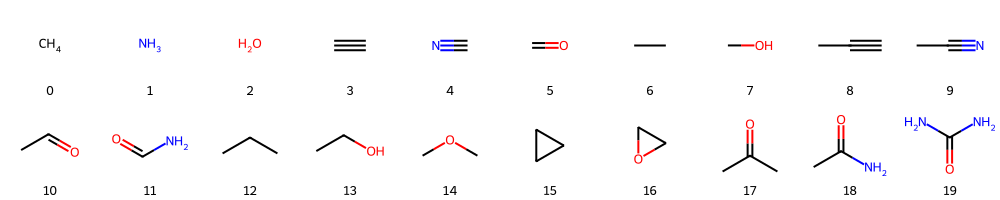

In [8]:
# get a list of molecules stored in moldata
molecules = moldata.get_mols()
# get images of molecules
MolData.draw_molecules(molecules, max_draw=20)

## Feature Encoding

In [9]:
fs_atom = moldata.extract_features(HeavyAtomExtractor(moldata))
fs_ring = moldata.extract_features(RingExtractor(moldata))
fs_aring = moldata.extract_features(AromaticRingExtractor(moldata))
fs_fp_structure1 = moldata.extract_features(FingerPrintStructureExtractor(moldata, radius=1))
fs_atom_sum = moldata.extract_features(FeatureSumOperator(moldata, fs_atom))

KeyboardInterrupt: 

In [28]:
features_fp = moldata.merge_features([fs_atom.id, fs_ring.id, fs_aring.id, fs_fp_structure1.id, fs_atom_sum.id])

In [29]:
features_fp.print_features()

|aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|:['aring:5', 'aring:6', 'aring:7', 'aring:9', 'fp:r1[C]:*#C', 'fp:r1[C]:*#N', 'fp:r1[C]:*=O', 'fp:r1[C]:*C', 'fp:r1[C]:*N', 'fp:r1[C]:*O', 'fp:r1[C]:*[CH2-]', 'fp:r1[C]:*[NH3+]', 'fp:r1[C]:C#*C', 'fp:r1[C]:C#*[CH2-]', 'fp:r1[C]:C*#N', 'fp:r1[C]:C*(=N)N', 'fp:r1[C]:C*(=N)O', 'fp:r1[C]:C*(=N)[NH-]', 'fp:r1[C]:C*(=O)O', 'fp:r1[C]:C*(=O)[O-]', 'fp:r1[C]:C*(C)(C)C', 'fp:r1[C]:C*(C)(C)N', 'fp:r1[C]:C*(C)(C)O', 'fp:r1[C]:C*(C)(C)[NH-]', 'fp:r1[C]:C*(C)(C)[NH3+]', 'fp:r1[C]:C*(C)(O)O', 'fp:r1[C]:C*(C)=N', 'fp:r1[C]:C*(C)=O', 'fp:r1[C]:C*(C)C', 'fp:r1[C]:C*(C)N', 'fp:r1[C]:C*(C)O', 'fp:r1[C]:C*(C)[NH-]', 'fp:r1[C]:C*(C)[NH3+]', 'fp:r1[C]:C*(F)(F)F', 'fp:r1[C]:C*(N)=O', 'fp:r1[C]:C*(N)=[NH2+]', 'fp:r1[C]:C*(O)O', 'fp:r1[C]:C*([NH-])=O', 'fp:r1[C]:C*=O', 'fp:r1[C]:C*C', 'fp:r1[C]:C*N', 'fp:r1[C]:C*O', 'fp:r1[C]:C*[NH-]', 'fp:r1[C]:C*[NH3+]', 'fp:r1[C]:C=*(C)C', 'fp:r1[C]:C=*(C)N', 'fp:r1[C]:C=*(C)[NH3+]', 'fp:r1[C]:C=

In [30]:
moldata.get_dataframe(features=features_fp)

,aring:5,aring:6,aring:7,aring:9,fp:r1[C]:*#C,fp:r1[C]:*#N,fp:r1[C]:*=O,fp:r1[C]:*C,fp:r1[C]:*N,fp:r1[C]:*O,...,atom:O,atom:O-,atom:sum,ring:3,ring:4,ring:5,ring:6,ring:7,ring:8,ring:9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,0,0,0,0,0,0,0,0,0,0,...,1,0,9,1,3,4,0,0,0,0
133881,0,0,0,0,0,0,0,0,0,0,...,1,0,9,1,3,4,0,0,0,0
133882,0,0,0,0,0,0,0,0,0,0,...,0,0,9,1,3,4,0,0,0,0
133883,0,0,0,0,0,0,0,0,0,0,...,0,0,9,1,3,4,0,0,0,0


# Training

regression model parameter optimization target='lumo': data_size=133885: model:Lasso n_splits=3 shuffle=True
optimized parameters: {'alpha': 1e-05}
regression model cross validation target='lumo': data_size=133885: model:Lasso n_splits=3 shuffle=True
R^2 score=0.89 cv_score=0.89 (+/- 0.00)
feature selection target='lumo': data_size=133885: model:Lasso:alpha=1e-05:opt threshold=None
feature size:278 -> 219
regression model cross validation target='lumo': data_size=133885: model:Lasso n_splits=3 shuffle=True
R^2 score=0.89 cv_score=0.89 (+/- 0.00)


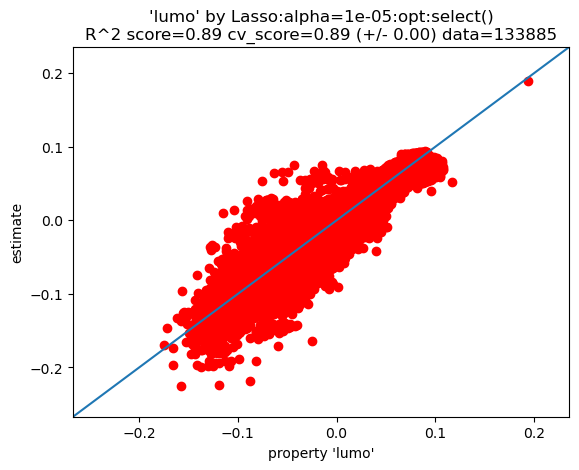

regression model parameter optimization target='gap': data_size=133885: model:Lasso n_splits=3 shuffle=True


In [ ]:
# model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'lumo', features_fp))
# model.plot_estimate()
# model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'gap', features_fp))
# model.plot_estimate()
# model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'homo', features_fp))
# model.plot_estimate()

model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'homo', features_fp))
model.plot_estimate()

In [ ]:
model = moldata.optimize_and_select_features(RidgeRegressionModel(moldata, 'lumo', features_fp))
model.plot_estimate()
model = moldata.optimize_and_select_features(RidgeRegressionModel(moldata, 'gap', features_fp))
model.plot_estimate()
model = moldata.optimize_and_select_features(RidgeRegressionModel(moldata, 'homo', features_fp))
model.plot_estimate()

In [ ]:
model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'lumo', features_fp))
model.plot_estimate()
model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'gap', features_fp))
model.plot_estimate()
model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'homo', features_fp))
model.plot_estimate()

In [ ]:
moldata.print_regression_models()

In [ ]:
legends = {
    fs_atom.id: 'atom',
    fs_ring.id: 'ring',
    fs_aring.id: 'aring',
    fs_fp_structure1.id: 'fp1'
}
df_model_lumo = moldata.get_regression_model_summary('lumo', legends=legends)
df_model_lumo

In [ ]:
legends = {
    fs_atom.id: 'atom',
    fs_ring.id: 'ring',
    fs_aring.id: 'aring',
    fs_fp_structure1.id: 'fp1'
}
df_model_egap = moldata.get_regression_model_summary('gap', legends=legends)
df_model_egap

In [ ]:
legends = {
    fs_atom.id: 'atom',
    fs_ring.id: 'ring',
    fs_aring.id: 'aring',
    fs_fp_structure1.id: 'fp1'
}
df_model_homo = moldata.get_regression_model_summary('homo', legends=legends)
df_model_homo

In [ ]:
best_model_lumo = df_model_lumo['model'][0]
best_model_lumo.plot_estimate()

In [ ]:
best_model_egap = df_model_egap['model'][0]
best_model_egap.plot_estimate()

In [ ]:
best_model_homo = df_model_egap['model'][0]
best_model_homo.plot_estimate()

# Feature Estimation

In [ ]:
design_param_1 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.175}, prediction_error=0.1)
design_param_2 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.20}, prediction_error=0.1)
design_param_3 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.25}, prediction_error=0.1)
design_param_4 = moldata.make_design_parameter({'homo': -0.175, 'gap': 0.25}, prediction_error=0.1)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_1, num_candidate=2)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_2, num_candidate=2)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_3, num_candidate=2)
moldata.estimate_feature([best_model_homo, best_model_egap], design_param_4, num_candidate=2)

In [ ]:
moldata.print_feature_estimates()

# Structure Generation

In [ ]:
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_1, without_estimate=False, max_gen=8, max_solution=20, max_node=200000)
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_2, without_estimate=False, max_gen=8, max_solution=20, max_node=200000)
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_3, without_estimate=False, max_gen=8, max_solution=20, max_node=200000)
moldata.generate_molecule([best_model_homo, best_model_egap], design_param_4, without_estimate=False, max_gen=8, max_solution=20, max_node=200000)

In [ ]:
moldata.get_generated_molecule_summary([best_model_lumo, best_model_egap], design_param_1)

In [ ]:
moldata.get_generated_molecule_summary([best_model_homo, best_model_egap], design_param_4)